<a href="https://colab.research.google.com/github/danmuendo/Flask-Project/blob/main/ZFS_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4. Part 1: Construct a Programming Solution (30 marks) (LO3)


In Part 1, you will deliver an interactive Python notebook (a . ipynb file) using Google Colab, with the
code used, with comments, to explain the scripts, the libraries used, and the logic. All such
commentary should be written using the built-in markup language (Markdown text) or embedded
using the standard Python syntax.
The notebook which you create should highlight some of the key findings which you have in the data
and the insights which you can provide to the business. The tasks which need to be completed in the
Python Notebook include the following:


#### Task 1: Loan Data Automation


In [20]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import numpy as np  # for numerical operations
import tabula as tp  # for PDF parsing
import seaborn as sns  # for data visualization

In [21]:
# Define data file paths
loan_data_excel = "/PDA/Loan_Data.xlsx"
loan_data_pdf = "/PDA/Loan_Application.pdf"

Handle PDF Data

In [30]:

# Load PDF data using Tabula
try:
  # Load all pages of the PDF into a list of DataFrames
  pdf_data_list = tp.read_pdf(loan_data_pdf, pages="all", multiple_tables=False)

  # Concatenate the DataFrames from all pages into a single DataFrame
  full_pdf_data = pd.concat(pdf_data_list, ignore_index=True)

  # Handle potential missing values
  full_pdf_data.dropna(how="all", inplace=True)  # Drop rows with all NaN values

  # Reset the index (optional, may be necessary depending on usage)
  full_pdf_data.reset_index(drop=True, inplace=True)

  print("PDF data loaded successfully.")
except (ImportError, NotImplementedError):
  print("Error: PDF parsing library not found or functionality not implemented.")
  full_pdf_data = pd.DataFrame()  # Create an empty DataFrame if PDF parsing fails

full_pdf_data.head()

PDF data loaded successfully.


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [29]:
# Load Excel data using pandas
try:
  excel_data = pd.read_excel(loan_data_excel)
  print("Excel data loaded successfully.")
except FileNotFoundError:
  print("Error: Excel data file not found. Please check the path.")
excel_data.head()

Excel data loaded successfully.


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [31]:
# Combine Excel and PDF data (if both were loaded successfully)
if not full_pdf_data.empty:
  combined_data = pd.concat([excel_data, full_pdf_data], ignore_index=True)
else:
  combined_data = excel_data  # Use only Excel data if PDF parsing fails
  print('used excel')

print("Comnining Data completed.")

# Explore the data (replace with your specific analysis)
combined_data.head()  # Display the first few rows of the combined data

Comnining Data completed.


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


#### Task 2: Descriptive analysis

In [25]:
# Data Cleaning
# Drop duplicates
combined_data.drop_duplicates(inplace=True)

# Handle missing values
# You can choose to fill missing values, drop rows/columns with missing values, or use imputation methods
combined_data.dropna(inplace=True)


In [26]:
# Descriptive Analysis

# Total amount loaned by ZFS
total_amount_zfs = combined_data['LoanAmount'].sum()
print("Total amount loaned by ZFS:", total_amount_zfs)

# Average amount loaned
average_loan_amount = combined_data['LoanAmount'].mean()
print("Average amount loaned:", average_loan_amount)

# Average loan term
average_loan_term = combined_data['Loan_Amount_Term'].mean()
print("Average loan term:", average_loan_term)

# Total number of applicants broken down into Approved and Rejected
approved_applicants = combined_data[combined_data['Loan_Status'] == 'Y'].shape[0]
rejected_applicants = combined_data[combined_data['Loan_Status'] == 'N'].shape[0]

# Number of males and females in each case
approved_males = combined_data[(combined_data['Loan_Status'] == 'Y') & (combined_data['Gender'] == 1)].shape[0]
approved_females = combined_data[(combined_data['Loan_Status'] == 'Y') & (combined_data['Gender'] == 2)].shape[0]
rejected_males = combined_data[(combined_data['Loan_Status'] == 'N') & (combined_data['Gender'] == 1)].shape[0]
rejected_females = combined_data[(combined_data['Loan_Status'] == 'N') & (combined_data['Gender'] == 2)].shape[0]

Total amount loaned by ZFS: 95164
Average amount loaned: 148.23052959501558
Average loan term: 334.4392523364486


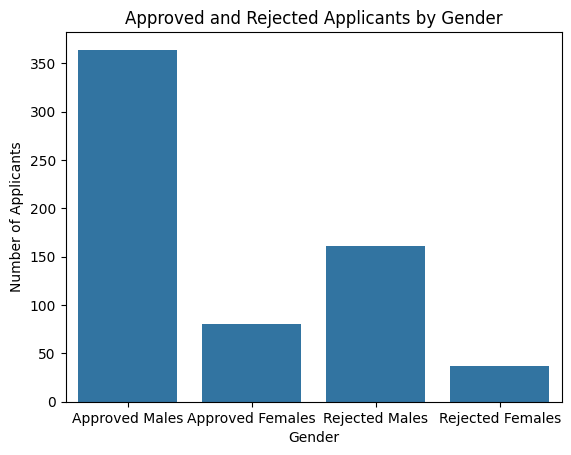

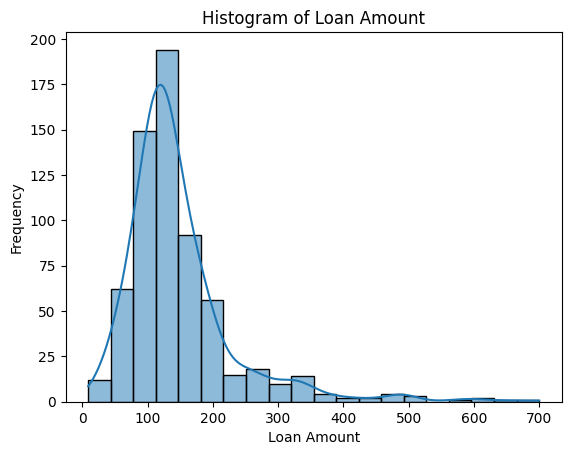

Maximum Loan Amount: 700
Minimum Loan Amount: 9
Percentage of Self-Employed Applicants Approved: 12.612612612612612


In [27]:

# Plotting the results
#Bar chart for approved and rejected applicants by gender
sns.barplot(x=['Approved Males', 'Approved Females', 'Rejected Males', 'Rejected Females'],
            y=[approved_males, approved_females, rejected_males, rejected_females])
plt.title('Approved and Rejected Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.show()

#Histogram of LoanAmount
sns.histplot(data=combined_data, x='LoanAmount', bins=20, kde=True)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Maximum and minimum loan amounts
max_loan_amount = combined_data['LoanAmount'].max()
min_loan_amount = combined_data['LoanAmount'].min()
print("Maximum Loan Amount:", max_loan_amount)
print("Minimum Loan Amount:", min_loan_amount)

# Percentage of self-employed who had their loan approved
total_approved = combined_data[combined_data['Loan_Status'] == 'Y'].shape[0]
self_employed_approved = combined_data[(combined_data['Loan_Status'] == 'Y') & (combined_data['Self_Employed'] == 1)].shape[0]
percentage_approved_self_employed = ((self_employed_approved / total_approved) * 100)
print("Percentage of Self-Employed Applicants Approved:", percentage_approved_self_employed)



In [ ]:
# Income Distribution (assuming separate ApplicantIncome and CoapplicantIncome columns)
try:
  # Combine applicant and coapplicant incomes (consider handling missing values)
  combined_income = combined_data['ApplicantIncome'].fillna(0) + combined_data['CoapplicantIncome'].fillna(0)
  plt.figure(figsize=(8, 6))
  plt.hist(combined_income, bins=20, edgecolor='black')
  plt.title('Distribution of Combined Applicant Income')
  plt.xlabel('Combined Income')
  plt.ylabel('Number of Applicants')
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()
except KeyError:
  print("Warning: 'ApplicantIncome' or 'CoapplicantIncome' column not found. Skipping income distribution analysis.")

# Top Ten Applicants by Loan Amount
top_ten_loans = combined_data.nlargest(10, 'LoanAmount')  # Sort by Loan Amount (descending)
print("Top Ten Applicants by Loan Amount:")
print(top_ten_loans[['Loan_ID', 'ApplicantIncome', 'LoanAmount']].to_string())

# Distribution of Property Areas (assuming 'Property_Area' column)
try:
  plt.figure(figsize=(8, 6))
  plt.boxplot(combined_data['Property_Area'])  # Create a box plot
  plt.title('Distribution of Property Area')
  plt.xlabel('Property Area')
  plt.ylabel('Square Footage')
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()
except KeyError:
  print("Warning: 'Property_Area' column not found. Skipping property area analysis.")
